In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%autosave 10

Autosaving every 10 seconds


**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
# Import the dataset
df_train = pd.read_csv('/content/drive/My Drive/cleaned_data.csv')

In [4]:
df_train.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university'],
      dtype='object')

In [7]:
X = df_train[['LIMIT_BAL', 'SEX','MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'graduate school','high school', 'others', 'university','LIMIT_BAL']]
y = df_train['default payment next month']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
X_train.shape, X_test.shape ,y_train.shape , X_test.shape

((21331, 27), (5333, 27), (21331,), (5333, 27))

_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [10]:
# fitting logistic regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
# predictiing the test result
y_pred = classifier.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [11]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [12]:
y_pred_prob= classifier.predict_proba(X_test)

In [13]:
y_pred_prob_2 = y_pred_prob[:,1]
y_pred_prob_2

array([0.05896279, 0.02721181, 0.36740443, ..., 0.27508845, 0.2560041 ,
       0.08035482])

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [14]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test , y_pred_prob_2)

0.653559413237551

_________________________________________________________________________
**Now, plot the ROC curve.**


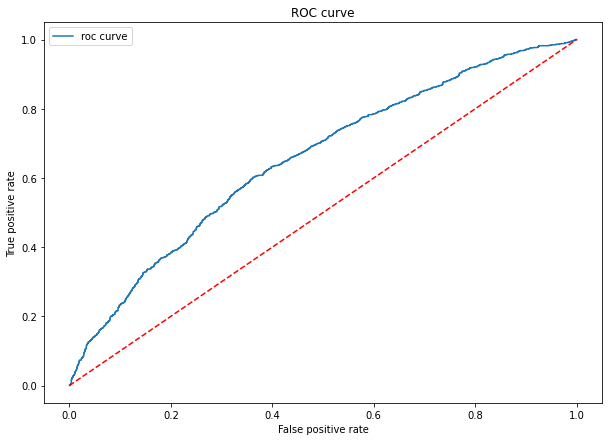

In [15]:
from sklearn.metrics import roc_curve
fpr,tpr,threshold = roc_curve(y_test , y_pred_prob_2)
plt.figure(figsize=(10,7))
plt.plot(fpr,tpr,label = 'roc curve')
plt.plot([0,1],[0,1],'r--')
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [16]:
from sklearn.metrics import precision_recall_curve
precision_recall_curve(y_test , y_pred_prob_2)

(array([0.21213829, 0.21199023, 0.21203008, ..., 0.        , 0.        ,
        1.        ]),
 array([1.        , 0.99911426, 0.99911426, ..., 0.        , 0.        ,
        0.        ]),
 array([4.39695924e-05, 4.48284415e-05, 5.00058957e-05, ...,
        4.98913694e-01, 5.05368916e-01, 5.29174414e-01]))

_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


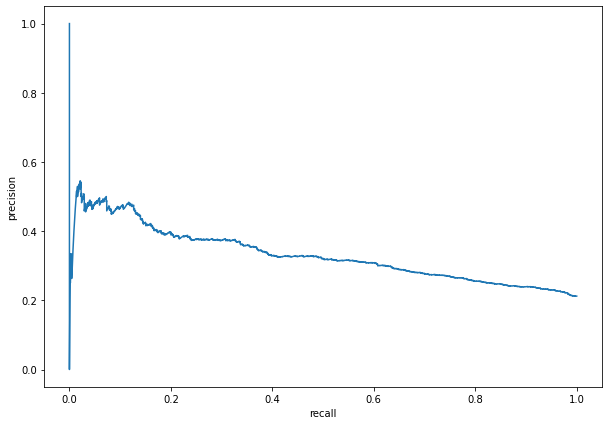

In [17]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
precision , recall ,threshold = precision_recall_curve(y_test , y_pred_prob_2)
plt.figure(figsize=(10,7))
plt.plot(recall ,precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [18]:
from sklearn.metrics import auc
print(auc(recall, precision))

0.3304678389980314


_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [19]:
y_pred_prob_train = classifier.predict_proba(X_train)
print(roc_auc_score(y_train , y_pred_prob_train[:,1]))

0.6542432730208085


    How is this different, conceptually and quantitatively, from your earlier calculation?
